Pythonで確率分布をプロットする
======
***

## 1. 準備
---

In [1]:
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12, 4)

# matplotlibでTexをラベルに使うため
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# default color
colors = ["blue", "orange", "green", "red"]

## 2. 離散型確率分布
---

### 2.1 二項分布（Binomial distribution）
> 結果が成功か失敗のいずれかである n 回の独立な試行を行ったときの成功数で表される離散確率分布
>
> [二項分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83)

#### 確率質量関数
パラメータ $p \: (0 \leq p \leq 1), \:, n \in \mathbb{N}$ に対し、
$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} \:\: (k=0, 1, ..., n)
$$

$n=1$ の場合をベルヌーイ分布と呼ぶ。

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = np,\: V[X] = np(1-p)
$$

### 2.2 ポアソン分布（Poisson distribution）
> 所与の時間間隔で発生する離散的な事象を数える特定の確率変数 X を持つ離散確率分布
>
> [ポアソン分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83)

#### 確率質量関数
定数 $\lambda > 0$ に対し、
$$
P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \lambda,\: V[X] = \lambda
$$

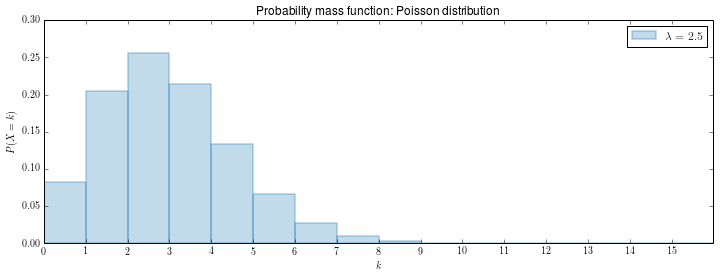

In [2]:
# Poisson distributionの確率質量関数（単一のλ）
k_max = 16
lambda_ = 2.5

k = np.arange(k_max)
plt.bar(k, stats.poisson.pmf(k, lambda_), color="#348ABD", width=1.0, lw="2", edgecolor="#348ABD",
        label="$\lambda = %.1f$" % lambda_, alpha=0.3)

plt.xticks(k)
plt.legend()
plt.ylabel("$P(X=k)$")
plt.xlabel("$k$")
plt.title("Probability mass function: Poisson distribution")

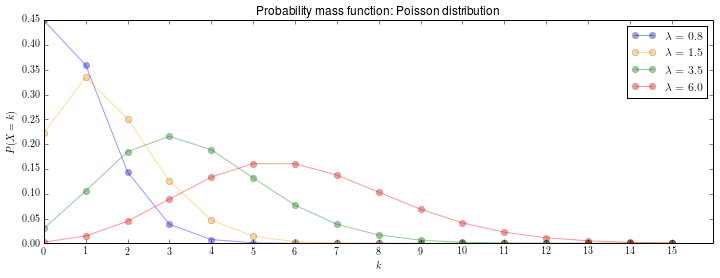

In [3]:
# Poisson distributionの確率質量関数（複数のλ）
# 見やすさのため折れ線にする
k_max = 16
lambda_ = [0.8, 1.5, 3.5, 6.]


k = np.arange(k_max)

for l, c in zip(lambda_, colors[:len(lambda_)]):
    plt.plot(k, stats.poisson.pmf(k, l), "-o",
            label="$\lambda = %.1f$" % l, alpha=0.4, color=c)

plt.xticks(k)
plt.legend()
plt.ylabel("$P(X=k)$")
plt.xlabel("$k$")
plt.title("Probability mass function: Poisson distribution")

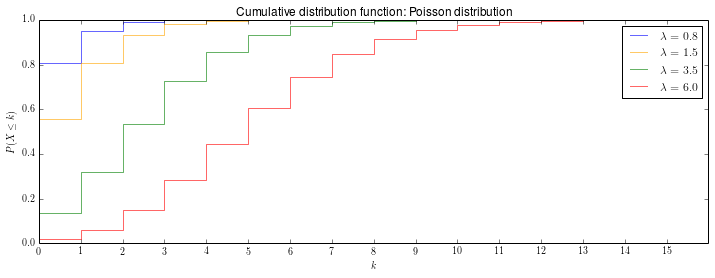

In [4]:
# Poisson distributionの累積分布関数（複数のλ）
k_max = 16
lambda_ = [0.8, 1.5, 3.5, 6.]

k = np.arange(k_max)

for l, c in zip(lambda_, colors[:len(lambda_)]):
    plt.step(k, stats.poisson.cdf(k, l),
            label="$\lambda = %.1f$" % l, alpha=0.6, color=c)

plt.xticks(k)
plt.legend()
plt.ylabel("$P(X \leq k)$")
plt.xlabel("$k$")
plt.title("Cumulative distribution function: Poisson distribution")

### 2.3 幾何分布（Geometric distribution）
> ベルヌーイ試行を繰り返して初めて成功させるまでの試行回数 X の分布
>
> [幾何分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83)

#### 確率質量関数
成功率 $p \: (0 \leq p \leq 1)$ である独立ベルヌーイ試行に対し、
$$
P(X=k) = p(1-p)^{k-1} \:\: (k=1, 2, 3, ...)
$$


#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{1}{p},\: V[X] = \frac{(1-p)}{p^2}
$$

### 2.4 負の二項分布（Negative Binomial distribution）
> 統計的に独立なベルヌーイ試行を行ったとき、r 回の「成功」を得るのに必要な試行回数の分布
>
> [負の二項分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E8%B2%A0%E3%81%AE%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83)

#### 確率質量関数
成功率 $p \: (0 \leq p \leq 1)$ である独立ベルヌーイ試行に対し、$r \: (1 \leq r)$ 回の成功を得るのに必要な試行回数は
$$
P(X=k) = \binom{k-1}{r-1} p^r(1-p)^{k-r}
$$

$r=1$ のとき幾何分布になる。

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{r}{p},\: V[X] = \frac{(1-p)}{p^2}
$$

### 2.5 超幾何分布（Hypergeometric distribution）
> 成功状態をもつ母集団から非復元抽出したときに成功状態がいくつあるかという確率を与える離散確率分布
>
> [超幾何分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E8%B6%85%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83)

#### 確率質量関数
$K$ 個の成功状態をもつ $N$ 個の要素よりなる母集団から $n$ 個の要素を非復元抽出したときに $k$ 個の成功状態が含まれている確率
$$
P(X=k) = \frac{ \binom{K}{k} \binom{N-K}{n-k} }{\binom{N}{n}}
$$

確率質量関数は $max(0, n + K - N) ≤ k ≤ min(K, n)$のとき正となる。

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{nK}{N},\: V[X] = \frac{(N-n)n(N-K)K}{(N-1)N^2 }
$$

### 2.6 一様分布（Uniform distribution）
> サイコロを振ったときの、それぞれの目の出る確率など、すべての事象の起こる確率が等しい現象のモデル
>
> [一様分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%B8%80%E6%A7%98%E5%88%86%E5%B8%83)

#### 確率質量関数
$N \in \mathbb{N}$に対し、
$$
P(X=k) = \frac{1}{N}, \:\: (k=1, 2, ..., N)
$$

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{N+1}{2},\: V[X] = \frac{(N^2 - 1)}{12}
$$

## 3. 連続型確率分布
---

### 3.1 正規分布（Normal distribution）
> 平均値の付近に集積するようなデータの分布を表した連続的な変数に関する確率分布
>
> [正規分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83)

#### 確率密度関数
- 平均 $\mu$ , 分散 $\sigma ^2$ に対し、
$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma ^2}} exp \left( - \frac{(x-\mu)^2}{2\sigma ^2} \right) \:\: (x \in \mathbb{R})
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \lambda,\: V[X] = \lambda
$$

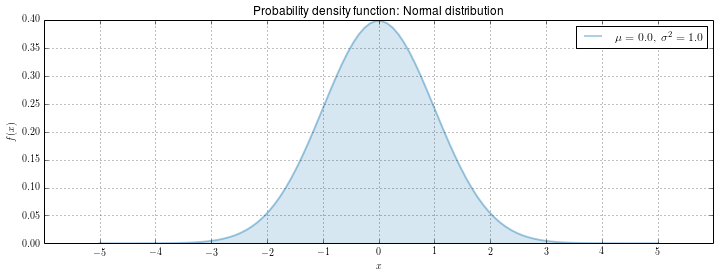

In [11]:
# Normal distributionの確率密度関数（単一のパラメータ）
mu = 0.0
sigma2 = 1.0
x = np.linspace(-5, 5, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma2), color="#348ABD", lw="2",
        label="$ \mu = %.1f,\: \sigma ^2 = %.1f$" % (mu, sigma2), alpha=0.4)
plt.fill_between(x, stats.norm.pdf(x, mu, sigma2), color="#348ABD", alpha=0.2)

plt.legend()
plt.xticks(np.arange(-5, 6))
plt.grid()
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("Probability density function: Normal distribution")

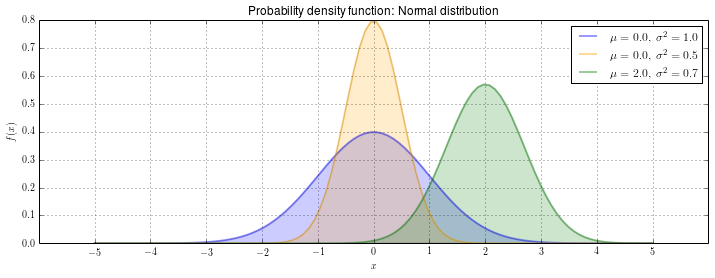

In [6]:
# Normal distributionの確率密度関数（複数のパラメータ）
mu = [0.0, 0.0, 2.0]
sigma2 = [1.0, 0.5, 0.7]
x = np.linspace(-5, 5, 100)

for m, s, c in zip(mu, sigma2, colors[:len(mu)]):
    plt.plot(x, stats.norm.pdf(x, m, s), lw="2",
            label="$ \mu = %.1f,\: \sigma ^2 = %.1f$" % (m, s), alpha=0.4, color=c)
    plt.fill_between(x, stats.norm.pdf(x, m, s), alpha=0.2, facecolor=c)

plt.legend()
plt.xticks(np.arange(-5, 6))
plt.grid()
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("Probability density function: Normal distribution")

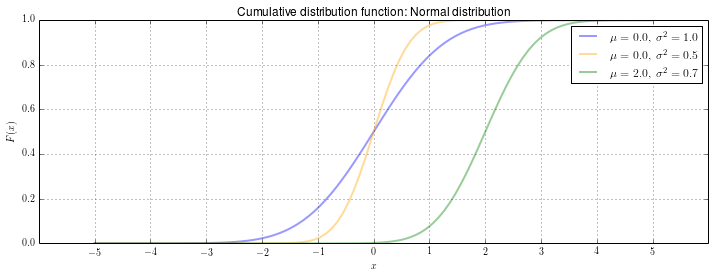

In [7]:
# Normal distributionの累積分布関数（複数のパラメータ）
mu = [0.0, 0.0, 2.0]
sigma2 = [1.0, 0.5, 0.7]
x = np.linspace(-5, 5, 100)

for m, s, c in zip(mu, sigma2, colors[:len(mu)]):
    plt.plot(x, stats.norm.cdf(x, m, s), lw="2",
            label="$ \mu = %.1f,\: \sigma ^2 = %.1f$" % (m, s), alpha=0.4, color=c)

plt.legend()
plt.xticks(np.arange(-5, 6))
plt.grid()
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.title("Cumulative distribution function: Normal distribution")

### 3.2 指数分布（Exponential distribution）
> 或る離散的な事象に対して、ポアソン分布が単位時間当たりの生起確率を示し、指数分布は生起期間の確率を示す
>
> [指数分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)

#### 確率密度関数
- 定数 $\lambda > 0$ に対し、
$$
\begin{eqnarray}
f(x) =\left\{ \begin{array}{ll}
\lambda e^{-\lambda x} & (x \geq 0) \\
0 & (x < 0) \\
\end{array} \right.
\end{eqnarray}
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{1}{\lambda}, \: V[X] = \frac{1}{\lambda ^2}
$$ 

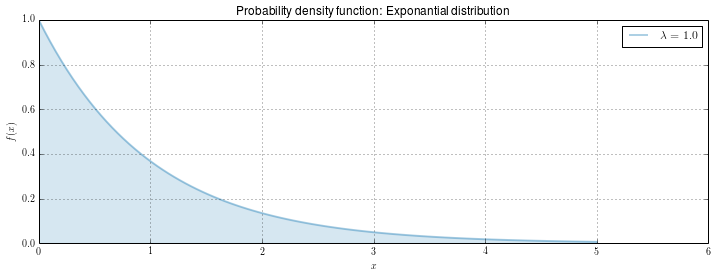

In [8]:
# Exponential distributionの確率密度関数（単一のパラメータ）
lambda_ = 1.0
x = np.linspace(0, 5, 100)

plt.plot(x, stats.expon.pdf(x, scale=1./lambda_), color="#348ABD", lw="2",
        label="$ \lambda = %.1f$" % lambda_, alpha=0.4)
plt.fill_between(x, stats.expon.pdf(x, scale=1./lambda_), color="#348ABD", alpha=0.2)

plt.legend()
plt.grid()
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("Probability density function: Exponantial distribution")

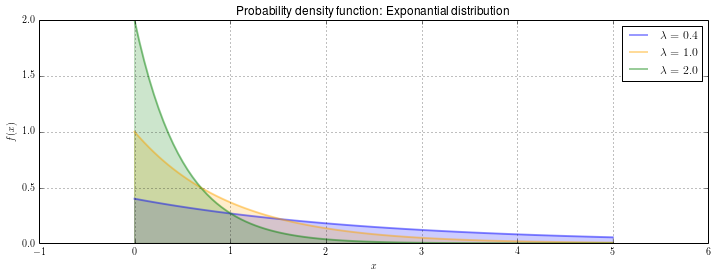

In [9]:
# Exponential distributionの確率密度関数（複数のパラメータ）
lambda_ = [0.4, 1.0, 2.0]
x = np.linspace(0, 5, 100)

for l, c in zip(lambda_, colors[:len(lambda_)]):
    plt.plot(x, stats.expon.pdf(x, scale=1./l), lw="2",
            label="$ \lambda = %.1f$" % l, alpha=0.4, color=c)
    plt.fill_between(x, stats.expon.pdf(x, scale=1./l), alpha=0.2, color=c)

plt.legend()
plt.grid()
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("Probability density function: Exponantial distribution")

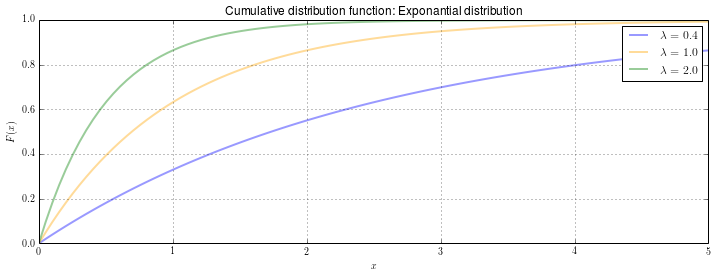

In [10]:
# Exponential distributionの累積分布関数（複数のパラメータ）
lambda_ = [0.4, 1.0, 2.0]
x = np.linspace(0, 5, 100)

for l, c in zip(lambda_, colors[:len(lambda_)]):
    plt.plot(x, stats.expon.cdf(x, scale=1./l), lw="2",
            label="$ \lambda = %.1f$" % l, alpha=0.4, color=c)

plt.legend()
plt.grid()
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.title("Cumulative distribution function: Exponantial distribution")

### 3.3 ガンマ分布（Gamma distribution）
